## Starter code for the final project.

In [1]:
import sys
import pickle
sys.path.append("../tools/")
from feature_format import featureFormat, targetFeatureSplit
from tester import dump_classifier_and_data
from helperFunctions import addNewFeatures
from tester import test_classifier

from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.grid_search import GridSearchCV


### Select features

In [2]:
### Task 1: Select what features you'll use.
### features_list is a list of strings, each of which is a feature name.
### The first feature must be "poi".
features_list = ['poi','salary', 'bonus', 'from_poi_to_this_person', 'from_this_person_to_poi'] # You will need to use more features

### 1. Explore Dataset

In [3]:
### Load the dictionary containing the dataset
with open("final_project_dataset.pkl", "r") as data_file:
    data_dict = pickle.load(data_file)
    
data = featureFormat(data_dict, features_list)

print "size of data set:" , len(data_dict)
print "number of features: ", len(data_dict.values()[0])
print "sample data point: "
data_dict.items()[0]
data_dict['CAUSEY RICHARD A']

size of data set: 146
number of features:  21
sample data point: 


{'bonus': 1000000,
 'deferral_payments': 'NaN',
 'deferred_income': -235000,
 'director_fees': 'NaN',
 'email_address': 'richard.causey@enron.com',
 'exercised_stock_options': 'NaN',
 'expenses': 30674,
 'from_messages': 49,
 'from_poi_to_this_person': 58,
 'from_this_person_to_poi': 12,
 'loan_advances': 'NaN',
 'long_term_incentive': 350000,
 'other': 307895,
 'poi': True,
 'restricted_stock': 2502063,
 'restricted_stock_deferred': 'NaN',
 'salary': 415189,
 'shared_receipt_with_poi': 1585,
 'to_messages': 1892,
 'total_payments': 1868758,
 'total_stock_value': 2502063}

### 2. Remove outliers

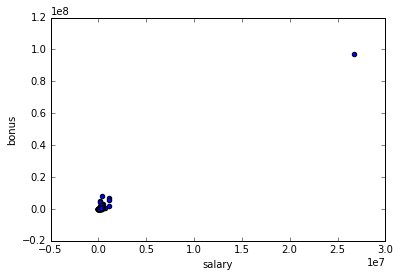

In [4]:
salary = data[:, 1]
bonus = data[:, 2]

import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(salary, bonus)
plt.xlabel("salary")
plt.ylabel("bonus")
plt.show()
plt.savefig('outlier.png')

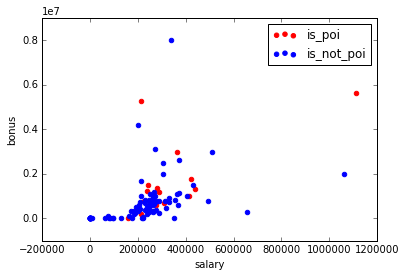

In [5]:
data_dict.pop("TOTAL",0)
data_cleaned = featureFormat(data_dict, features_list)

poi_salary = [x[1] for x in data_cleaned if x[0]]
poi_bonus = [x[2] for x in data_cleaned if x[0]]

not_poi_salary = [x[1] for x in data_cleaned if not x[0]]
not_poi_bonus = [x[2] for x in data_cleaned if not x[0]]

import matplotlib.pyplot as plt
%matplotlib inline

is_poi_color = "r"
is_not_poi_color = "b"

%matplotlib inline
plt.scatter(poi_salary, poi_bonus, color=is_poi_color, label="is_poi")
plt.scatter(not_poi_salary, not_poi_bonus, color=is_not_poi_color, label="is_not_poi")
plt.xlabel("salary")
plt.ylabel("bonus")
plt.legend()
plt.show()
plt.savefig('outlier_removed.png')

### 3. Create New Features

In [6]:
### Task 3: Create new feature(s)
### Store to my_dataset for easy export below.
from helperFunctions import addNewFeatures
my_dataset = addNewFeatures(data_dict)
my_dataset.items()[0]

('METTS MARK',
 {'bonus': 600000,
  'deferral_payments': 'NaN',
  'deferred_income': 'NaN',
  'director_fees': 'NaN',
  'email_address': 'mark.metts@enron.com',
  'exercised_stock_options': 'NaN',
  'expenses': 94299,
  'fraction_from_poi': 0.04708798017348203,
  'fraction_to_poi': 0.034482758620689655,
  'from_messages': 29,
  'from_poi_to_this_person': 38,
  'from_this_person_to_poi': 1,
  'loan_advances': 'NaN',
  'long_term_incentive': 'NaN',
  'other': 1740,
  'poi': False,
  'restricted_stock': 585062,
  'restricted_stock_deferred': 'NaN',
  'salary': 365788,
  'shared_receipt_with_poi': 702,
  'to_messages': 807,
  'total_payments': 1061827,
  'total_stock_value': 585062})

In [7]:
### Extract features and labels from dataset for local testing
features_list = ['poi', 'salary', 'bonus', 'fraction_from_poi', 'fraction_to_poi']
# features_list = ['poi', 'fraction_from_poi', 'fraction_to_poi']
data = featureFormat(my_dataset, features_list, sort_keys = True)
labels, features = targetFeatureSplit(data)

### 4. Try different classifiers

In [3]:
### Task 4: Try a varity of classifiers
### Please name your classifier clf for easy export below.
### Note that if you want to do PCA or other multi-stage operations,
### you'll need to use Pipelines. For more info:
### http://scikit-learn.org/stable/modules/pipeline.html

# Provided to give you a starting point. Try a variety of classifiers.
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.grid_search import GridSearchCV

parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}

classifiers = [
    GaussianNB(),
    DecisionTreeClassifier(min_samples_split=40),
    SVC(kernel="rbf"),
    AdaBoostClassifier(DecisionTreeClassifier(), algorithm="SAMME", n_estimators=200),
    RandomForestClassifier(max_depth=2, random_state=0),
    KNeighborsClassifier(n_neighbors=3),
    GridSearchCV(SVC(), parameters)
]

# clf = GaussianNB()

# from sklearn.tree import DecisionTreeClassifier
# clf = DecisionTreeClassifier(min_samples_split=40)

# from sklearn.svm import SVC
# clf=SVC(kernel="rbf")

In [9]:
### Task 5: Tune your classifier to achieve better than .3 precision and recall 
### using our testing script. Check the tester.py script in the final project
### folder for details on the evaluation method, especially the test_classifier
### function. Because of the small size of the dataset, the script uses
### stratified shuffle split cross validation. For more info: 
### http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.StratifiedShuffleSplit.html

# Example starting point. Try investigating other evaluation techniques!
from sklearn.cross_validation import train_test_split
features_train, features_test, labels_train, labels_test = \
    train_test_split(features, labels, test_size=0.3, random_state=42)

In [10]:
### Task 6: Dump your classifier, dataset, and features_list so anyone can
### check your results. You do not need to change anything below, but make sure
### that the version of poi_id.py that you submit can be run on its own and
### generates the necessary .pkl files for validating your results.

# dump_classifier_and_data(clf, my_dataset, features_list)
dump_classifier_and_data(my_dataset, features_list)

#### ----------------------------- do not change the result of any cell --------------------

In [28]:
# for naive bayes
from tester import test_classifier
test_classifier(clf, my_dataset, features_list)

GaussianNB()
	Accuracy: 0.23282	Precision: 0.16703	Recall: 0.80750	F1: 0.27680	F2: 0.45702
	Total predictions: 11000	True positives: 1615	False positives: 8054	False negatives:  385	True negatives:  946



In [13]:
# for dec tree
from tester import test_classifier
test_classifier(clf, my_dataset, features_list)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=40, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')
	Accuracy: 0.77140	Precision: 0.13333	Recall: 0.02600	F1: 0.04351	F2: 0.03099
	Total predictions: 10000	True positives:   52	False positives:  338	False negatives: 1948	True negatives: 7662



In [16]:
# for svm
from tester import test_classifier
test_classifier(clf, my_dataset, features_list)

Got a divide by zero when trying out: SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
Precision or recall may be undefined due to a lack of true positive predicitons.


In [24]:
# after adding features
# svm 
test_classifier(clf, my_dataset, features_list)

Got a divide by zero when trying out: SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
Precision or recall may be undefined due to a lack of true positive predicitons.


In [29]:
# for naive bayes
from tester import test_classifier
test_classifier(clf, my_dataset, features_list)

GaussianNB()
	Accuracy: 0.23282	Precision: 0.16703	Recall: 0.80750	F1: 0.27680	F2: 0.45702
	Total predictions: 11000	True positives: 1615	False positives: 8054	False negatives:  385	True negatives:  946



#### ------------------------------------ final result --------------------------------

In [ ]:
from tester import test_classifier
i = 0
for clf in classifiers:
    test_classifier(clf, my_dataset, features_list)
    print "----------------------------------------------------------------------------------------------------------------------"

GaussianNB()
	Accuracy: 0.80173	Precision: 0.39315	Recall: 0.16650	F1: 0.23393	F2: 0.18820
	Total predictions: 11000	True positives:  333	False positives:  514	False negatives: 1667	True negatives: 8486

----------------------------------------------------------------------------------------------------------------------
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=40, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')
	Accuracy: 0.79727	Precision: 0.15976	Recall: 0.02700	F1: 0.04619	F2: 0.03238
	Total predictions: 11000	True positives:   54	False positives:  284	False negatives: 1946	True negatives: 8716

----------------------------------------------------------------------------------------------------------------------
Got a divide by zero when trying out: SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.

### ------------------------------------------------------------

In [36]:
from tester import test_classifier
i = 0
for clf in classifiers:
    test_classifier(clf, my_dataset, features_list)
    print "----------------------------------------------------------------------------------------------------------------------"

GaussianNB()
	Accuracy: 0.85250	Precision: 0.04082	Recall: 0.00800	F1: 0.01338	F2: 0.00953
	Total predictions: 8000	True positives:    8	False positives:  188	False negatives:  992	True negatives: 6812

----------------------------------------------------------------------------------------------------------------------
Got a divide by zero when trying out: DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=40, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')
Precision or recall may be undefined due to a lack of true positive predicitons.
----------------------------------------------------------------------------------------------------------------------
Got a divide by zero when trying out: SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',


### Feature selection

In [ ]:
# send all the features (except: 
# string values, e.g. email addresses, 
# -ve vals,
#replace cols )
# and all data for feature selection to tester.py
my_dataset = addNewFeatures(data_dict)
features_list = ['poi', 'bonus', 'director_fees', 'expenses', 'from_messages', 'fraction_from_poi', 'fraction_to_poi', 'loan_advances', 'long_term_incentive', 'other', 'salary', 'shared_receipt_with_poi', 'to_messages', 'total_payments']
my_dataset = data_dict
from tester import test_classifier
i = 0
for clf in classifiers:
    test_classifier(clf, my_dataset, features_list)
    print "----------------------------------------------------------------------------------------------------------------------"

('selected features:', ['bonus', 'loan_advances', 'long_term_incentive', 'other', 'total_payments'])
GaussianNB()
	Accuracy: 0.74814	Precision: 0.11658	Recall: 0.11600	F1: 0.11629	F2: 0.11612
	Total predictions: 14000	True positives:  232	False positives: 1758	False negatives: 1768	True negatives: 10242

----------------------------------------------------------------------------------------------------------------------
('selected features:', ['bonus', 'loan_advances', 'long_term_incentive', 'other', 'total_payments'])
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=40, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')
	Accuracy: 0.82657	Precision: 0.16562	Recall: 0.05300	F1: 0.08030	F2: 0.06134
	Total predictions: 14000	True positives:  106	False positives:  534	False negatives: 1894	True negatives: 11466

-------

In [2]:
#final code
# the first cell containg the imports needs to be run, and then we can jump directly to this cell

features_list = ['poi', 'salary', 'bonus', 'fraction_from_poi', 'fraction_to_poi']
with open("final_project_dataset.pkl", "r") as data_file:
    data_dict = pickle.load(data_file)

data_dict.pop("TOTAL",0)

my_dataset = addNewFeatures(data_dict)

dump_classifier_and_data(my_dataset, features_list)


parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}

classifiers = [
    GaussianNB(),
    DecisionTreeClassifier(min_samples_split=40),
    SVC(kernel="rbf"),
    AdaBoostClassifier(DecisionTreeClassifier(), algorithm="SAMME", n_estimators=200),
    RandomForestClassifier(max_depth=2, random_state=0),
    KNeighborsClassifier(n_neighbors=3),
    KNeighborsClassifier(),
    KNeighborsClassifier(algorithm="ball_tree"),
    KNeighborsClassifier(algorithm="kd_tree"),
    # GridSearchCV(SVC(), parameters)
]
i = 0
for clf in classifiers:
    test_classifier(clf, my_dataset, features_list)
    print "----------------------------------------------------------------------------------------------------------------------"

GaussianNB()
	Time for fitting: 0.001000
	Accuracy: 0.80173	Precision: 0.39315	Recall: 0.16650	F1: 0.23393	F2: 0.18820
	Total predictions: 11000	True positives:  333	False positives:  514	False negatives: 1667	True negatives: 8486

----------------------------------------------------------------------------------------------------------------------
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=40, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')
	Time for fitting: 0.002000
	Accuracy: 0.79727	Precision: 0.15976	Recall: 0.02700	F1: 0.04619	F2: 0.03238
	Total predictions: 11000	True positives:   54	False positives:  284	False negatives: 1946	True negatives: 8716

----------------------------------------------------------------------------------------------------------------------
Got a divide by zero when trying out

#### As K nearest neighbor is yielding the best result, let's tune the parameters

In [3]:
classifiers = [
    KNeighborsClassifier(n_neighbors=3), # k = 3
    KNeighborsClassifier(), # k =5
    KNeighborsClassifier(algorithm="ball_tree"),
    KNeighborsClassifier(algorithm="kd_tree"),
    KNeighborsClassifier(algorithm="ball_tree", leaf_size=40), #leaf size tells the number of leaves after which the algo turns to brute
    KNeighborsClassifier(algorithm="kd_tree", leaf_size=40) # leaf_size affects the speed of search
]
i = 0
for clf in classifiers:
    test_classifier(clf, my_dataset, features_list)
    print "----------------------------------------------------------------------------------------------------------------------"
    
# a greater k is suppressing the noise, but looks like here it is underfitting
# increasing the leaf_size is not speeding up the process (atleast upto 3 decimal places)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')
	Time for fitting: 0.001000
	Accuracy: 0.83627	Precision: 0.59256	Recall: 0.31850	F1: 0.41431	F2: 0.35096
	Total predictions: 11000	True positives:  637	False positives:  438	False negatives: 1363	True negatives: 8562

----------------------------------------------------------------------------------------------------------------------
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')
	Time for fitting: 0.001000
	Accuracy: 0.82727	Precision: 0.57310	Recall: 0.19600	F1: 0.29210	F2: 0.22570
	Total predictions: 11000	True positives:  392	False positives:  292	False negatives: 1608	True negatives: 8708

-------------------------------------------------------------------------------------------------------------------